In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('./../gcb_data/historical_budget.csv')
df.head()

,Year,fossil fuel and industry,land-use change emissions,atmospheric growth,ocean sink,land sink,budget imbalance
0,1750,NaN,NaN,-0.077592,NaN,0.089932,NaN
1,1751,0.003,NaN,-0.073988,NaN,-0.529983,NaN
2,1752,0.003,NaN,-0.070596,NaN,-0.265491,NaN
3,1753,0.003,NaN,-0.067628,NaN,-0.165419,NaN
4,1754,0.003,NaN,-0.064024,NaN,-0.328966,NaN


In [4]:
year = df['Year']
atmg = df['atmospheric growth']

In [5]:
# Remove NaN values and years with them.
year = year[atmg.notna()]
atmg = atmg.dropna()

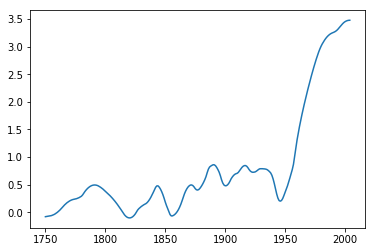

In [6]:
plt.plot(year, atmg)

In [7]:
atmg.shape

(255,)

# Autocorrelation of atmg

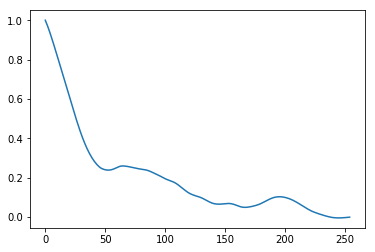

In [8]:
result = np.correlate(atmg, atmg, mode='full')
result = result[result.size // 2:]
plt.plot(result/result[0])

In [18]:
pd.DataFrame([year, result/result[0]]).T.iloc[98]

Year         1848.000000
Unnamed 0       0.201225
Name: 98, dtype: float64

In [21]:
# Decorrelation time at 1848, so:
dec_time = 1848-1750
# and so there are the following independent samples:
year.size/dec_time, round(year.size/dec_time)98

(2.6020408163265305, 3)

## Generator to produce equally-sized chunks

In [36]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

# Split atm-growth into 100 year periods

In [41]:
atmg_100 = list(chunks(atmg,100))

In [42]:
mean_atmg_100 = []
for i in atmg_100:
    mean_atmg_100.append(np.mean(i))
mean_atmg_100

[0.20158232, 0.53201188, 2.427800872727273]

In [43]:
std_atmg_100 = []
for i in atmg_100:
    std_atmg_100.append(np.std(i))
std_atmg_100

[0.1889834876564024, 0.2690872757782233, 1.001797235202251]

# Split atm-growth into 50 year periods

In [44]:
atmg_50 = list(chunks(atmg,50))

In [45]:
mean_atmg_50 = []
for i in atmg_50:
    mean_atmg_50.append(np.mean(i))
mean_atmg_50

[0.23075352000000002,
 0.17241112,
 0.41900528000000004,
 0.64501848,
 2.3239991200000008,
 3.4658184]

In [46]:
std_atmg_50 = []
for i in atmg_50:
    std_atmg_50.append(np.std(i))
std_atmg_50

[0.19699852760934428,
 0.17583850407241752,
 0.2898784902352735,
 0.18773758702851592,
 0.9926857781553362,
 0.009784575158891693]

# Split atm-growth into 10 year periods

In [47]:
atmg_10 = list(chunks(atmg,10))

In [48]:
mean_atmg_10 = []
for i in atmg_10:
    mean_atmg_10.append(np.mean(i))
mean_atmg_10

[-0.0545052,
 0.0981348,
 0.24095919999999998,
 0.40508960000000005,
 0.4640892,
 0.2841436,
 0.011108799999999999,
 -0.0239136,
 0.1886376,
 0.4020792,
 0.012507999999999997,
 0.2391148,
 0.4514964,
 0.6763859999999999,
 0.7155212000000001,
 0.5855651999999999,
 0.7956571999999998,
 0.7511796000000001,
 0.7590448000000001,
 0.33364559999999993,
 0.6967168000000001,
 1.7942832000000002,
 2.6514204000000006,
 3.145974,
 3.3316011999999993,
 3.4658184]

In [49]:
std_atmg_10 = []
for i in atmg_10:
    std_atmg_10.append(np.std(i))
std_atmg_10

[0.019932160629495235,
 0.06272309043534127,
 0.021192409040975017,
 0.06595822552373586,
 0.031748859811968046,
 0.06584564718066031,
 0.08172363249489097,
 0.06759641193317882,
 0.06521230272149572,
 0.06857747478115535,
 0.08277572509860603,
 0.15203023754029985,
 0.0347774417667545,
 0.13765139756646136,
 0.13115823208384594,
 0.08179675702226831,
 0.04846390944362617,
 0.022033328387694853,
 0.03818051137635533,
 0.13338799425675463,
 0.25166011291295254,
 0.2903474356438507,
 0.2073988978828962,
 0.0771920646543412,
 0.0613339449257914,
 0.009784575158891693]

# Plot of atmg and means

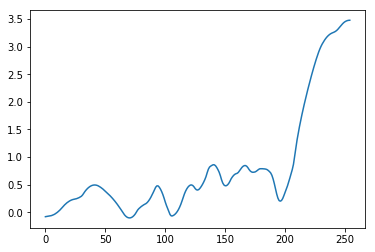

In [56]:
plt.plot(atmg)

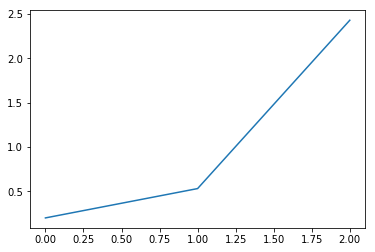

In [52]:
plt.plot(mean_atmg_100)

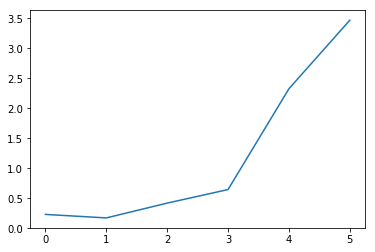

In [53]:
plt.plot(mean_atmg_50)

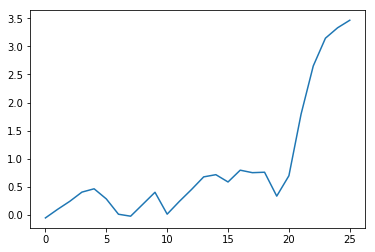

In [54]:
plt.plot(mean_atmg_10)